# This is a student performance data table , we have to predict their performance.
Step_01  , IMPORTING OF LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING OF DATA FILES

In [2]:
df = pd.read_csv('JOB.csv')

In [3]:
df.shape

(1500, 11)

DATA DUPLICATION CHECK

In [4]:
df.duplicated().sum()

0

NULL VALUE CHECK

In [5]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,35.148667,9.252728,20.000000,27.000000,35.000000,43.000000,50.000000
Gender,1500.0,0.492000,0.500103,0.000000,0.000000,0.000000,1.000000,1.000000
EducationLevel,1500.0,2.188000,0.862449,1.000000,2.000000,2.000000,3.000000,4.000000
ExperienceYears,1500.0,7.694000,4.641414,0.000000,4.000000,8.000000,12.000000,15.000000
PreviousCompanies,1500.0,3.002000,1.410670,1.000000,2.000000,3.000000,4.000000,5.000000
DistanceFromCompany,1500.0,25.505379,14.567151,1.031376,12.838851,25.502239,37.737996,50.992462
InterviewScore,1500.0,50.564000,28.626215,0.000000,25.000000,52.000000,75.000000,100.000000
SkillScore,1500.0,51.116000,29.353563,0.000000,25.750000,53.000000,76.000000,100.000000
PersonalityScore,1500.0,49.387333,29.353201,0.000000,23.000000,49.000000,76.000000,100.000000
RecruitmentStrategy,1500.0,1.893333,0.689642,1.000000,1.000000,2.000000,2.000000,3.000000


DEFINING OF FEATURE & TARGET VARIABLES

In [7]:
X = df.drop(columns='HiringDecision')
y = df['HiringDecision']

In [8]:
X

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,1,2,0,3,26.783828,48,78,91,1
1,39,1,4,12,3,25.862694,35,68,80,2
2,48,0,2,3,2,9.920805,20,67,13,2
3,34,1,2,5,2,6.407751,36,27,70,3
4,30,0,1,6,1,43.105343,23,52,85,2
...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3
1496,27,1,2,10,3,14.847731,43,97,7,2
1497,24,1,1,1,2,4.289911,31,91,58,1
1498,48,0,2,4,4,36.299263,9,37,44,2


In [9]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64

SAMPLING

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
X.shape, X_train.shape, X_test.shape,y.shape,y_train.shape,y_test.shape

((1500, 10), (1200, 10), (300, 10), (1500,), (1200,), (300,))

MODEL FITTING

In [12]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

ACURACY PREDICTION ON 1. TRAIN DATA

In [14]:
# accuracy on training data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print(training_data_accuracy)

0.97


In [22]:
print('Accuracy on Training data : ', round(training_data_accuracy*100,2), '%')

Accuracy on Training data :  97.0 %


ACCURACY PREDICTIO ON 2. TEST DATA

In [23]:
# accuracy on test data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print(test_data_accuracy)

0.9366666666666666


In [25]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  93.67 %


CONFUSION MATRIX IMPLIMANTATION 1.TEST DATA

In [26]:
cf_matrix = confusion_matrix(y_test,y_test_prediction)

print(cf_matrix)

[[203   4]
 [ 15  78]]


<Axes: >

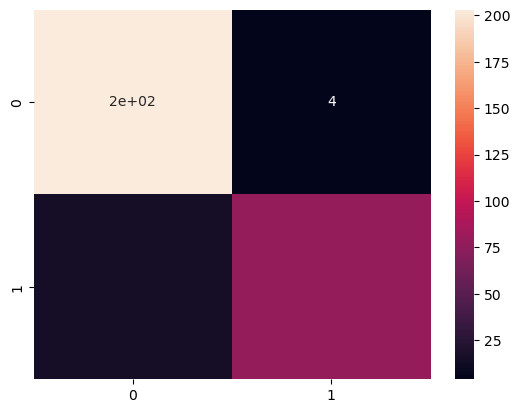

In [27]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

CLASSIFICATION REPORT 1. TEST DATA

In [29]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       207
           1       0.95      0.84      0.89        93

    accuracy                           0.94       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.94      0.94      0.94       300



COFUSIN MATRIX ON 2.TRAIN DATA

In [30]:
cf_matrix = confusion_matrix(y_train,y_train_prediction)

print(cf_matrix)

[[820   8]
 [ 28 344]]


<Axes: >

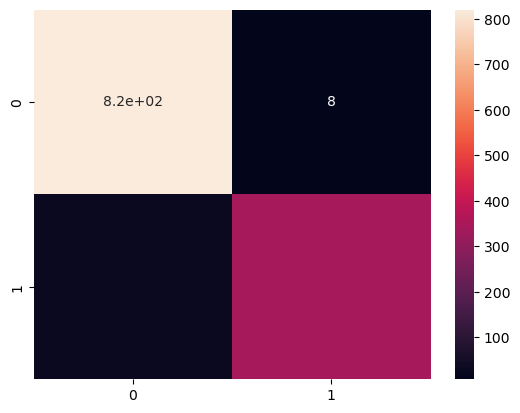

In [31]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

CLASSIFICATION REPORT 2. TRAIN DATA

In [32]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       828
           1       0.98      0.92      0.95       372

    accuracy                           0.97      1200
   macro avg       0.97      0.96      0.96      1200
weighted avg       0.97      0.97      0.97      1200



In [ ]:
From the above study we come to the conlusion that 93 cadidates are selcted for jobs , but 207 candidates are to be selected

*****************************************************DONE***********************************************************